In [1]:
from kan import *
import torch
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
! cd ../..

In [3]:
! ls

figures       kan.ipynb     model         nn.ipynb      xgboost.ipynb


In [4]:
# Load the data
df_resampled = pd.read_csv('../../data/processed/heart_resampled_se.csv')
df = pd.read_csv('../../data/processed/heart_se.csv')

In [5]:
df.shape

(303, 29)

In [6]:
df.head()

,index,age,resting_blood_pressure,cholesterol,max_heart_rate,oldpeak,sex_1,chest_pain_type_0,chest_pain_type_1,chest_pain_type_2,...,num_major_vessels_0,num_major_vessels_1,num_major_vessels_2,num_major_vessels_3,num_major_vessels_4,thalassemia_0,thalassemia_1,thalassemia_2,thalassemia_3,target
0,0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,1,0.166667,0.339623,0.283105,0.885496,0.564516,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,2,0.250000,0.339623,0.178082,0.770992,0.225806,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,4,0.583333,0.245283,0.520548,0.702290,0.096774,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [7]:
# Split the data into features and target variable
X = df.drop(['target','index'], axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values).view(-1, 1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values).view(-1, 1)


In [9]:
dataset = {
    'train_input': X_train_tensor,
    'train_label': y_train_tensor,
    'test_input': X_test_tensor,
    'test_label': y_test_tensor
}


In [10]:
dataset

{'train_input': tensor([[0.2708, 0.2453, 0.3858,  ..., 0.0000, 1.0000, 0.0000],
         [0.6042, 0.5283, 0.3288,  ..., 0.0000, 0.0000, 1.0000],
         [0.3542, 0.5283, 0.2397,  ..., 0.0000, 1.0000, 0.0000],
         ...,
         [0.8333, 0.6226, 0.2466,  ..., 0.0000, 1.0000, 0.0000],
         [0.3542, 0.2453, 0.2808,  ..., 0.0000, 0.0000, 1.0000],
         [0.7083, 0.4340, 0.1575,  ..., 0.0000, 1.0000, 0.0000]]),
 'train_label': tensor([[1],
         [0],
         [0],
         [1],
         [0],
         [1],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [1],
         [1],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1],
         [0],
         [1],
    

In [11]:
dataset['train_input'].shape

torch.Size([242, 27])

In [12]:
# KAN model training
model = KAN([27,3,1], grid=3, k=2)
def train_acc():
    return torch.mean((torch.round(model(dataset['train_input'])[:,0]) == dataset['train_label'][:,0]).float())

def test_acc():
    return torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float()) 
results = model.fit(dataset, opt="LBFGS", steps=3, metrics=(train_acc, test_acc))
results['train_acc'][-1], results['test_acc'][-1]
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.10e-01 | test_loss: 3.93e-01 | reg: 2.47e+01 | : 100%|█| 3/3 [00:00<00:00,  9.97it/s

saving model version 0.1


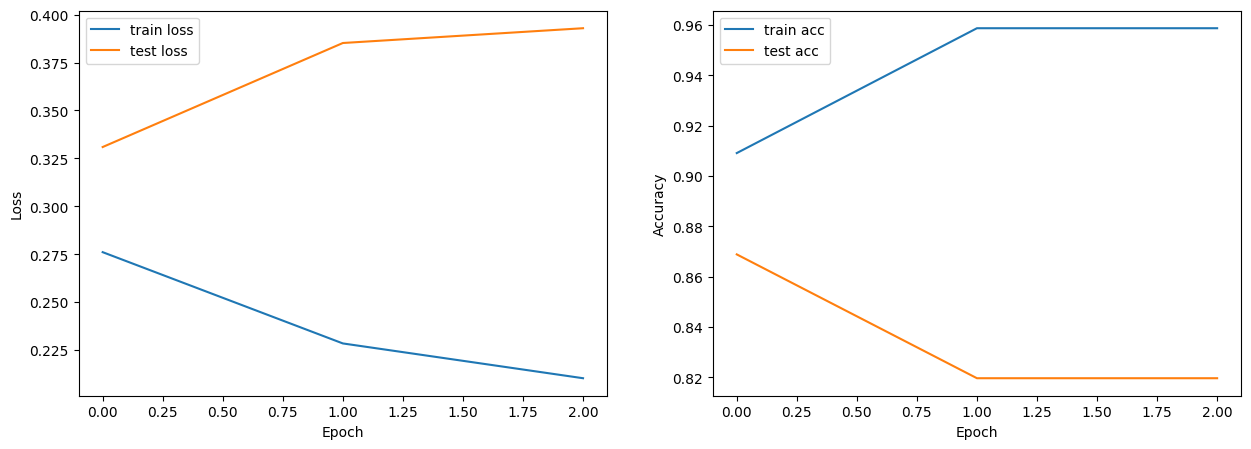

In [13]:
train_loss = results['train_loss']
train_acc = results['train_acc']
test_acc = results['test_acc']
test_loss = results['test_loss']

# Plot the training and testing loss and accuracy
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(train_loss, label='train loss')
ax[0].plot(test_loss, label='test loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].legend()

ax[1].plot(train_acc, label='train acc')
ax[1].plot(test_acc, label='test acc')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

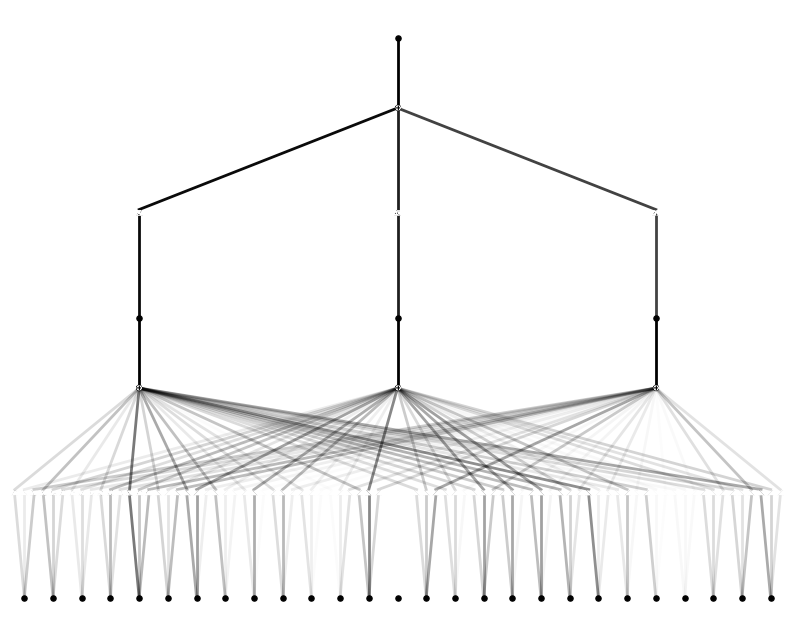

In [14]:
model.plot(scale=1)

In [15]:
model.prune()

saving model version 0.2


MultKAN(
  (act_fun): ModuleList(
    (0-1): 2 x KANLayer(
      (base_fun): SiLU()
    )
  )
  (base_fun): SiLU()
  (symbolic_fun): ModuleList(
    (0-1): 2 x Symbolic_KANLayer()
  )
)

In [16]:
lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.5226870179176331, c=1
fixing (0,0,1) with x, r2=0.9576669335365295, c=1
fixing (0,0,2) with sin, r2=0.9937108159065247, c=2
fixing (0,1,0) with sin, r2=0.9983067512512207, c=2
fixing (0,1,1) with x, r2=0.13442127406597137, c=1
fixing (0,1,2) with sin, r2=0.9982406497001648, c=2
fixing (0,2,0) with x, r2=0.2079305797815323, c=1
fixing (0,2,1) with sin, r2=0.973685622215271, c=2
fixing (0,2,2) with x, r2=0.5273867845535278, c=1
fixing (0,3,0) with x, r2=0.31916695833206177, c=1
fixing (0,3,1) with x, r2=0.5670872926712036, c=1
fixing (0,3,2) with x, r2=0.8331981897354126, c=1
fixing (0,4,0) with x, r2=0.9610731601715088, c=1
fixing (0,4,1) with sin, r2=0.9991358518600464, c=2
fixing (0,4,2) with exp, r2=0.9975971579551697, c=2
fixing (0,5,0) with x, r2=0.9999998807907104, c=1
fixing (0,5,1) with x, r2=0.9999988079071045, c=1
fixing (0,5,2) with x, r2=1.0000004768371582, c=1
fixing (0,6,0) with x, r2=1.0000004768371582, c=1
fixing (0,6,1) with x, r2=1.000000476

In [17]:
model.symbolic_formula()[0][0]


0.110584123994902*x_1 + 0.125911525028078*x_10 + 0.0207624153681046*x_11 + 0.00177135936864419*x_12 + 0.131453839160003*x_13 + 0.0140184498450237*x_14 - 0.0332926142920081*x_15 - 0.0929693405925253*x_16 + 0.00204090388613398*x_17 + 0.108663130399021*x_18 + 0.135129695202286*x_19 + 0.0271689828638449*x_2 - 0.146557664884983*x_20 - 0.160769997502378*x_21 - 0.115782566943082*x_22 + 0.153261822141763*x_23 - 0.00748686071806697*x_24 + 0.0990368227274526*x_25 + 0.079976309180005*x_26 - 0.12804906350831*x_27 + 0.0709861410426792*x_3 - 0.00445101338226202*x_4 - 0.340957886000224*x_5 - 0.0498111318587047*x_6 - 0.157919171489025*x_7 - 0.101485217007592*x_8 + 0.0936882510808088*x_9 + 1.22714488846913e-7*exp(10.0*x_23) - 0.0129077288628091*sin(5.02975940704346*x_1 + 7.38279962539673) + 0.0579993386533935*sin(4.00536012649536*x_2 + 1.57567977905273) + 0.00932322379171258*sin(4.74391984939575*x_2 - 4.96791982650757) - 0.0275942965393456*sin(7.52447986602783*x_3 - 3.22304010391235) + 0.03548649953332

In [18]:
formula1 = model.symbolic_formula()[0][0]
ex_round(formula1, 4)

0.1106*x_1 + 0.1259*x_10 + 0.0208*x_11 + 0.0018*x_12 + 0.1315*x_13 + 0.014*x_14 - 0.0333*x_15 - 0.093*x_16 + 0.002*x_17 + 0.1087*x_18 + 0.1351*x_19 + 0.0272*x_2 - 0.1466*x_20 - 0.1608*x_21 - 0.1158*x_22 + 0.1533*x_23 - 0.0075*x_24 + 0.099*x_25 + 0.08*x_26 - 0.128*x_27 + 0.071*x_3 - 0.0045*x_4 - 0.341*x_5 - 0.0498*x_6 - 0.1579*x_7 - 0.1015*x_8 + 0.0937*x_9 - 0.0129*sin(5.0298*x_1 + 7.3828) + 0.058*sin(4.0054*x_2 + 1.5757) + 0.0093*sin(4.7439*x_2 - 4.9679) - 0.0276*sin(7.5245*x_3 - 3.223) + 0.0355*sin(3.2004*x_5 + 9.0032) + 0.377 + 0.0298*exp(-4.145*x_5) + 0.0296*exp(-8.2*x_24) + 0.0178*exp(-4.7995*x_24)

In [19]:

def acc(formula1, X, y):
    batch = X.shape[0]
    correct = 0
    num_features = X.shape[1]  # Assuming X has 27 features
    logits = []

    for i in range(batch):
        # Initialize substituted formulas
        substituted_formula1 = formula1

        # Substitute all x_1, x_2, ..., x_27 with the corresponding values in X[i, :]
        for j in range(num_features):
            substituted_formula1 = substituted_formula1.subs(f'x_{j+1}', X[i, j])

        # Convert the substituted formulas to floats (assuming they evaluate to scalar values)
        logit1 = np.array(substituted_formula1).astype(np.float64)

        # Check if the prediction matches the true label
        correct += np.round(logit1) == y[i]
        logits.append([float(logit1) ,y[i].item()])

    return correct / batch, logits

print('train acc of the formula:', acc(formula1, dataset['train_input'], dataset['train_label'])[0])
print('test acc of the formula:', acc(formula1, dataset['test_input'], dataset['test_label'])[0])


train acc of the formula: tensor([0.8760])
test acc of the formula: tensor([0.8689])


In [20]:
#plot logits
_, logits = acc(formula1, dataset['test_input'], dataset['test_label'])


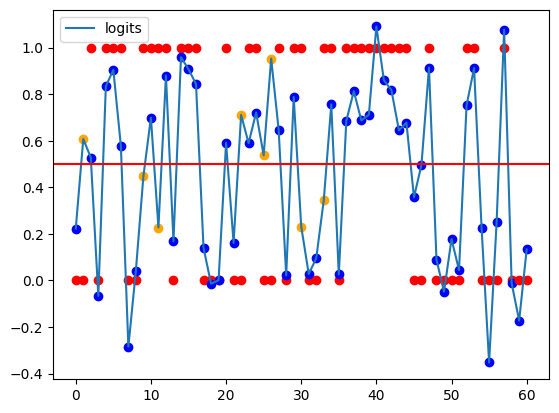

In [21]:
#plot logits and true labels, logits with a line
import matplotlib.pyplot as plt
import numpy as np

logits = np.array(logits)
plt.plot(logits[:,0], label='logits')
for i in range(logits.shape[0]):
    plt.scatter(i, logits[i,1], color='red')
    if round(logits[i,0]) == logits[i,1]:
        color = 'blue' # Correct prediction
    else:
        color = 'orange' # Incorrect prediction
    plt.scatter(i, logits[i,0], color=color)
#line at 0.5
plt.axhline(y=0.5, color='r', linestyle='-')
plt.legend()


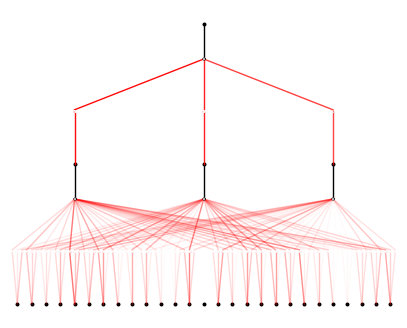

In [22]:
model.plot()